In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Metrics in machine learning are needed to evaluate the quality of a model's performance in order to understand how well the model has memorized the patterns from the training sample.  

Today we will consider metrics for the classification task - prediction of a nominal (qualitative) target variable. For such a task, we want our models to predict the correct object class label as often as possible.

<img src='https://static.javatpoint.com/tutorial/machine-learning/images/classification-algorithm-in-machine-learning.png' width=600>


To calculate different classification metrics, let's generate data using `sklearn`.

## Data generation

Let's work with a set of data for the classification task. Let's get the data consisting of two informative features (`n_features=2, n_informative=2`) in the amount of 20 pieces (`n_samples=20`) to predict one target variable, which will consist of two classes (`n_classes=2`), through the `make_classification` method.

In [2]:
from sklearn import datasets


X, y = datasets.make_classification(
    n_samples=20,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=2
)

X, y

(array([[ 0.24306743, -0.52734094],
        [ 0.96417816, -0.37583852],
        [-1.08486058,  0.00847624],
        [-0.90653761,  3.3851625 ],
        [ 1.33279979,  1.25629151],
        [ 0.72576002,  0.53047004],
        [-0.77546276, -0.9788468 ],
        [ 1.03317819, -0.88253973],
        [ 1.39939732,  3.2047161 ],
        [-0.07784592, -0.67730036],
        [ 1.2610877 , -1.3003902 ],
        [-2.44391337, -0.56099989],
        [-1.11064538,  0.7571574 ],
        [-0.90474756,  0.59452911],
        [-2.51019507, -0.30991259],
        [ 0.9153728 ,  0.08016006],
        [ 1.28700068, -1.90827144],
        [-1.94625628, -0.53314708],
        [-0.91390999,  2.05571391],
        [-1.33222706, -0.85982898]]),
 array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]))

We got 20 objects from two features, we can visualize them and do coloring depending on the class label:

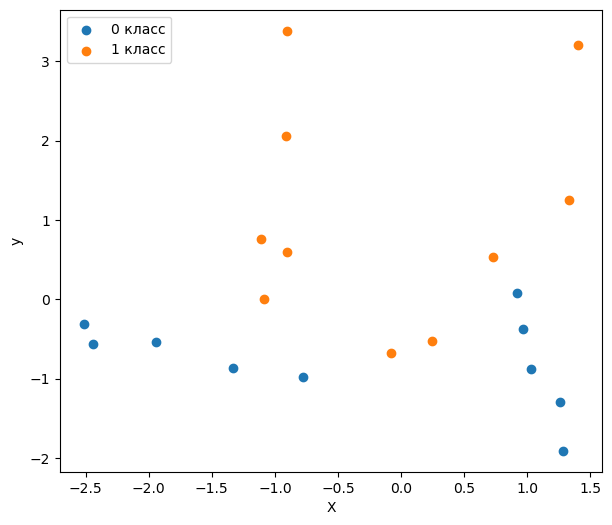

In [3]:
plt.figure(figsize=(7, 6))

class_0 = X[y == 0]
class_1 = X[y == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], label='0 класс')
plt.scatter(class_1[:, 0], class_1[:, 1], label='1 класс')

plt.legend()
plt.xlabel('X')
plt.ylabel('y');

## Model training

Take the linear model for classification logistic regression from `sklearn` and train on the sample.

In [4]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

Now let's make predictions on the whole sample to see how well the model has learned to predict the target class label.

In [5]:
pred = logreg.predict(X)

## Metrics

Let's display the true values of the target variable and the classes predicted by the model side by side.

In [6]:
pred_df = pd.DataFrame({
    'ground truth': y,
    'prediction': pred
})

pred_df

,ground truth,prediction
0,1,0
1,0,0
2,1,0
3,1,1
4,1,1
5,1,1
6,0,0
7,0,0
8,1,1
9,1,0


In the first line should have predicted 1 class, but the model predicted 0, but the next object has no problem, the target label is 0 class, predicted also zero class, we can further look at all objects and compare the truth with the predicted class.

## Accuracy

If we do this, we will know how many times the model answered correctly - this is our first Accuracy metric.


This is the most obvious and simple way to calculate the quality of predictions:

$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$


The proportion of correct answers can vary from 0 to 1, where 0 is the model never got it right, all its predictions are wrong, and 1 is the model predicted everything perfectly.

Let's make a new column in the dataframe that will indicate whether our model guessed the true class, False if the prediction is wrong and True if it is correct:

In [7]:
pred_df['right'] = pred_df['ground truth'] == pred_df['prediction']
pred_df

,ground truth,prediction,right
0,1,0,False
1,0,0,True
2,1,0,False
3,1,1,True
4,1,1,True
5,1,1,True
6,0,0,True
7,0,0,True
8,1,1,True
9,1,0,False


Let's find the objects on which the model made a mistake:

In [8]:
wrong_objects_0_class = X[~(pred_df['right']) & (pred_df['ground truth'] == 0)]
wrong_objects_1_class = X[~(pred_df['right']) & (pred_df['ground truth'] == 1)]

And we visualize by marking in green the class 1 objects on which the model erroneously made class zero predictions and in red the class 0 objects that the model erroneously assigned to class 1.

Text(0, 0.5, 'y')

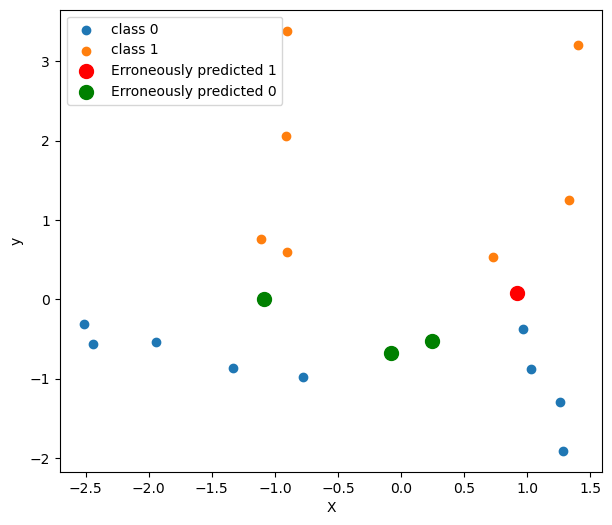

In [9]:
plt.figure(figsize=(7, 6))

# visualization of class data
class_0 = X[y == 0]
class_1 = X[y == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], label='class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], label='class 1')

# visualization of errors by class
plt.scatter(wrong_objects_0_class[:, 0], wrong_objects_0_class[:, 1], c='r', label='Erroneously predicted 1', s=100)
plt.scatter(wrong_objects_1_class[:, 0], wrong_objects_1_class[:, 1], c='g', label='Erroneously predicted 0', s=100)

plt.legend()
plt.xlabel('X')
plt.ylabel('y')

There were 4 errors.   
Let's count how many times the model made a correct prediction:

In [10]:
pred_df[pred_df['right'] == True].shape[0]

16

Then we can calculate the proportion of correct answers (the number of True values divided by the number of objects):

In [11]:
pred_df['right'].sum() / pred_df.shape[0]

0.8

Or we can use the `sklearn` implementation:

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(pred_df['ground truth'], pred_df['prediction'])

0.8

We got 0.8 or 80% - the proportion of correct predictions relative to all predictions.

Metric accuracy is good, simple, but it has a couple of problems.

### Class imbalance

Let's imagine that in our sample there are a lot of objects of the zero class and nothing of the first class, moreover, this happens very often, an example is the task of predicting fraudulent transactions, or it is also called fraud detection: there are a lot of ordinary transactions and very few transactions with malicious intent.

Let us generate such a sample where there is a class imbalance, class 0 objects are 9 times more than class 1 objects (`weights=(0.9, 0.1)`).  
For ease of understanding, we will assume that class 0 is normal transactions in the bank, and class 1 is suspicious fraudulent transactions.

In [13]:
from sklearn import datasets


X_disbalance, y_disbalance = datasets.make_classification(
    n_samples=20,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=2,
    weights=(0.9, 0.1)
)

X_disbalance, y_disbalance

(array([[ 0.66930255, -0.35556485],
        [ 0.96417816, -0.37583852],
        [-1.1177634 , -0.85116212],
        [-0.26257856, -1.50684503],
        [ 1.27004352, -2.01184296],
        [ 0.72576002,  0.53047004],
        [-0.77546276, -0.9788468 ],
        [ 1.03317819, -0.88253973],
        [ 0.7545933 ,  1.11410377],
        [ 0.37973272,  0.79063286],
        [ 1.2610877 , -1.3003902 ],
        [-2.44391337, -0.56099989],
        [-0.66010918, -1.0843706 ],
        [-0.90474756,  0.59452911],
        [-2.51019507, -0.30991259],
        [ 0.9153728 ,  0.08016006],
        [ 1.28700068, -1.90827144],
        [-1.94625628, -0.53314708],
        [-0.85711456, -1.16420714],
        [-1.33222706, -0.85982898]]),
 array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]))

We get 20 objects, where 18 are zero class objects (normal transaction) and only 2 first class objects (fraudulent transaction), we visualize:

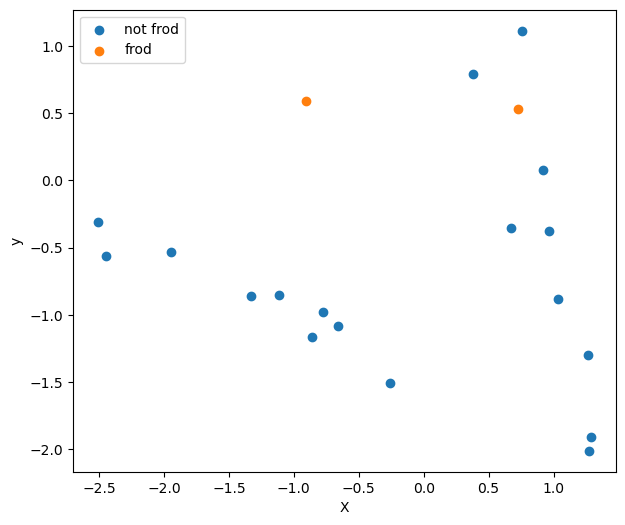

In [14]:
plt.figure(figsize=(7, 6))

class_0 = X_disbalance[y_disbalance == 0]
class_1 = X_disbalance[y_disbalance == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], label='not frod')
plt.scatter(class_1[:, 0], class_1[:, 1], label='frod')

plt.legend()
plt.xlabel('X')
plt.ylabel('y');

If we take a constant model (`a(x) = 0`) that will always respond 0 class to any object it sees, we get a decent accuracy metric:

In [15]:
pred = [0 for i in range(20)]
pred

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [16]:
pred_df_disbalance = pd.DataFrame({
    'ground truth': y_disbalance,
    'prediction': pred
})

pred_df_disbalance

,ground truth,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


Let's make a new column in the dataframe that will indicate whether our model guessed the true class, False if the prediction is wrong and True if it is correct:

In [17]:
pred_df_disbalance['right'] = pred_df_disbalance['ground truth'] == pred_df_disbalance['prediction']
pred_df_disbalance

,ground truth,prediction,right
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True
5,1,0,False
6,0,0,True
7,0,0,True
8,0,0,True
9,0,0,True


Then we can calculate the proportion of correct answers (the number of True values divided by the number of objects):

In [18]:
pred_df_disbalance['right'].sum() / pred_df_disbalance.shape[0]

0.9

We get a very high proportion of correct answers, which tends to 1, but in fact, the model is useless, the algorithm always answers with zero class, the model will never answer with the first class. So, although the accuracy metric is high, but we cannot talk about a quality model here.

Let's find the objects on which the model made a mistake:

In [19]:
wrong_objects_0_class = X_disbalance[~(pred_df_disbalance['right']) & (pred_df_disbalance['ground truth'] == 0)]
wrong_objects_1_class = X_disbalance[~(pred_df_disbalance['right']) & (pred_df_disbalance['ground truth'] == 1)]

And we visualize by marking in green - objects with a fraudulent transaction that our constant model mistakenly assigned to the class of normal non-fraudulent transaction.

Text(0, 0.5, 'y')

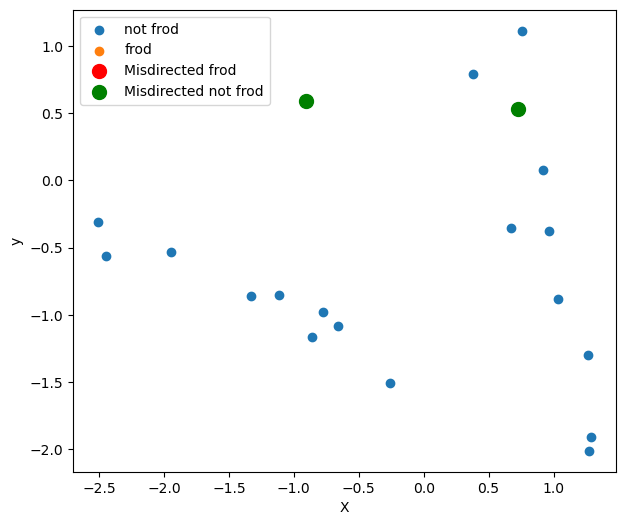

In [20]:
plt.figure(figsize=(7, 6))

# visualization of class data
class_0 = X_disbalance[y_disbalance == 0]
class_1 = X_disbalance[y_disbalance == 1]
plt.scatter(class_0[:, 0], class_0[:, 1], label='not frod')
plt.scatter(class_1[:, 0], class_1[:, 1], label='frod')

# visualization of errors by class
plt.scatter(wrong_objects_0_class[:, 0], wrong_objects_0_class[:, 1], c='r', label='Misdirected frod', s=100)
plt.scatter(wrong_objects_1_class[:, 0], wrong_objects_1_class[:, 1], c='g', label='Misdirected not frod', s=100)

plt.legend()
plt.xlabel('X')
plt.ylabel('y')

There were 2 errors, we never found any fraudulent transaction, and accordingly we didn't even help the bank.

### Mistakes have different prices

Now let's talk about another problem of accuracy metrics. We continue to familiarize ourselves with the tasks of banks, we have trained a model of credit scoring, with the help of which the bank makes a decision on granting a loan to a person.  
The model predicts to whom the loan should be granted (a good citizen and will pay correctly), and to whom it should not be granted (a person constantly misses payments on the loan).

We have two models, let's test their work on 10 clients.   

0 will mark clients who will not repay the loan, and 1 - who will repay.
Predictions of the models are the same, 0 - the model predicts the non-repayment of the loan, so we do not give the loan, and 1 - the client will repay the loan, so we can be confident in him and give him the money.

In [21]:
clients = [0, 0, 0, 0, 0,
           1, 1, 1, 1, 1]
first_model_pred = [0, 0, 1, 1, 1,
                    1, 1, 1, 1, 1]
second_model_pred = [0, 0, 0, 0, 0,
                     1, 1, 0, 0, 0]


df = pd.DataFrame({
    'clients': clients,
    'first_model': first_model_pred,
    'second_model': second_model_pred
})

df

,clients,first_model,second_model
0,0,0,0
1,0,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,1,1
6,1,1,1
7,1,1,0
8,1,1,0
9,1,1,0


The sample is balanced, 5 clients have class 0 and 5 have class 1. Let's look at the predictions of the models:
1. The first one gives credit to 8 people, in the end 5 people pay back the credit and 3 do not pay back the credit
2. The second model gives credit to 2 people, and all 2 pay back.

Can you think of which model is better? Which model would you take to your bank to evaluate clients?

In fact, there is no right answer, it all depends on the bank's strategy.  
- If the bank wants to make more money, it is better to give more loans, so it is better to use the first model.   
- If the bank wants to lose less, it is better to give loans only to trusted people, so it is better to use the second model.

That said, the accuracy metric will be the same on these two models, even though they are completely different.

In [22]:
df['first_model_right'] = df['clients'] == df['first_model']
df['second_model_right'] = df['clients'] == df['second_model']

df

,clients,first_model,second_model,first_model_right,second_model_right
0,0,0,0,True,True
1,0,0,0,True,True
2,0,1,0,False,True
3,0,1,0,False,True
4,0,1,0,False,True
5,1,1,1,True,True
6,1,1,1,True,True
7,1,1,0,True,False
8,1,1,0,True,False
9,1,1,0,True,False


In [23]:
print(f"Accuracy of the first model {df['first_model_right'].sum() / df.shape[0]}")
print(f"Accuracy of the second model {df['second_model_right'].sum() / df.shape[0]}")

Accuracy of the first model 0.7
Accuracy of the second model 0.7


This is because the accuracy metric only takes into account correct responses on all classes, so both models were equally good on this metric, because they both gave the same number of correct answers, 7 each, except that they had different errors. Let's find them.

First, let's look at the first model's errors:

In [24]:
# sort by the error in the first_model_right column
df[~df['first_model_right']]

,clients,first_model,second_model,first_model_right,second_model_right
2,0,1,0,False,True
3,0,1,0,False,True
4,0,1,0,False,True


In [25]:
# and derive only the true values and predictions by the first model
df[~df['first_model_right']][['clients', 'first_model']]

,clients,first_model
2,0,1
3,0,1
4,0,1


In these three errors, the first model mistakenly made a loan to 3 people who had no plans to pay it back.

Now it's the turn of the second model:

In [26]:
# sort by the error in the second_model_right column
df[~df['second_model_right']]

,clients,first_model,second_model,first_model_right,second_model_right
7,1,1,0,True,False
8,1,1,0,True,False
9,1,1,0,True,False


In [27]:
# and derive only the true values and predictions by the second model
df[~df['second_model_right']][['clients', 'second_model']]

,clients,second_model
7,1,0
8,1,0
9,1,0


And here it's the other way around. The model did not approve loans to people who were able to pay everything correctly.

These are the different errors that can affect our models and the decisions we make about the usefulness of trained algorithms in different ways.

## Summary

<table>

<tr>
<td>
Metric
</td>

<td>
Formula
</td>

<td>
Value ranges
</td>

<td>
Ideal value
</td>
</tr>

<tr>
<td>
Accuracy
</td>

<td>
$$accuracy(a,x) = \frac{1}{l} \sum^{l}_{i=1}[a(x_{i})=y_{i}].$$

</td>

<td>
[0, 1]
</td>

<td>
1
</td>
</tr>

<table>